## Observations and Insights 

* Mice on the Capomulin and Ramicane regimen tend to have smaller tumours.
* Infubinol was the only regimen out of four that had an outlier for final tumour volume of 36.3 mm3 which is a lot smaller than the other mice on the same regimen.
* There is a strong positive correlation between the weight of a mouse and their average tumour volume.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, how = "outer")
# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice.
mouse_data["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data[mouse_data.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data[mouse_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data.drop(mouse_data[mouse_data["Mouse ID"] == "g989"].index)

In [24]:
# Checking the number of mice in the clean DataFrame.
mice_info = clean_mouse_data.loc[:, ["Mouse ID"]]
mice_info = mice_info.drop_duplicates()
total_mice = mice_info.count()[0]
total_mice

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_group = clean_mouse_data.groupby("Drug Regimen")

summary_statistics = pd.DataFrame({"Mean tumor volume (mm3)": regimen_group["Tumor Volume (mm3)"].mean(),
                                "Median tumor volume (mm3)": regimen_group["Tumor Volume (mm3)"].median(),
                                "Variance tumor volume (mm3)": regimen_group["Tumor Volume (mm3)"].var(),
                                "Standard deviation tumor volume (mm3)": regimen_group["Tumor Volume (mm3)"].std(),
                                "SEM tumor volume (mm3)": regimen_group["Tumor Volume (mm3)"].sem()
                                })

summary_statistics

,Mean tumor volume (mm3),Median tumor volume (mm3),Variance tumor volume (mm3),Standard deviation tumor volume (mm3),SEM tumor volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

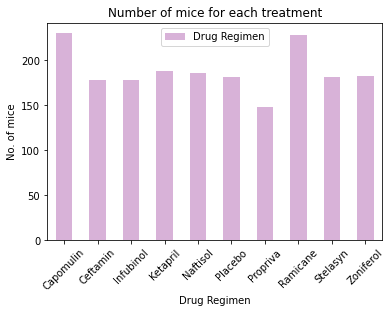

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count_regimen = regimen_group['Drug Regimen'].count()
count_regimen.plot(kind = "bar", color = "purple", alpha = 0.3)
plt.title("Number of mice for each treatment")
plt.xticks(rotation = 45)
plt.ylabel("No. of mice")
plt.legend()
plt.show()

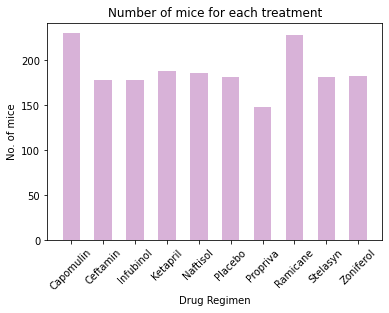

In [28]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_regimen = plt.bar(count_regimen.index,count_regimen.values,
                    color = "purple", alpha = 0.3, width = 0.55)
plt.title("Number of mice for each treatment")
plt.xticks(rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("No. of mice")
plt.show()

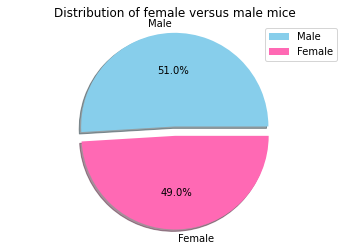

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_mouse_data.Sex.value_counts()
# count_gender = gender_group.count()

gender_group.plot(kind = "pie", explode = (0.05, 0.05), autopct="%1.1f%%",
                shadow = True, colors = ["skyblue", "hotpink"])
plt.title("Distribution of female versus male mice")
plt.ylabel("")
plt.axis("equal")
plt.legend()
plt.show()

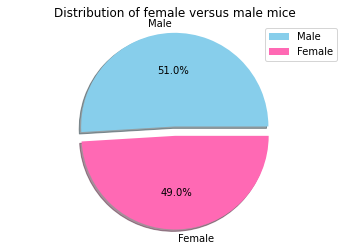

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_group, explode = (0.05, 0.05), autopct="%1.1f%%",
                shadow = True, colors = ["skyblue", "hotpink"], labels=["Male", "Female"])
plt.title("Distribution of female versus male mice")
plt.axis("equal")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_id_timepoint = clean_mouse_data.groupby(["Mouse ID"])['Timepoint'].max()
mice_id_timepoint = mice_id_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_merged = mice_id_timepoint.merge(clean_mouse_data,on=['Mouse ID','Timepoint'],how="left")
last_timepoint_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_filter = last_timepoint_merged.loc[last_timepoint_merged["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    final_tumor_vol.append(tumor_vol_filter)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_filter.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_filter.loc[(tumor_vol_filter < lower_bound) | (tumor_vol_filter > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


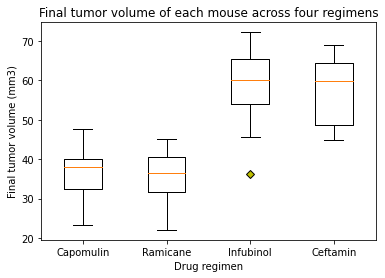

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
yellow_diamond = dict(markerfacecolor="y", marker="D")
plt.boxplot(final_tumor_vol, labels=treatment, flierprops=yellow_diamond)
plt.title("Final tumor volume of each mouse across four regimens")
plt.xlabel("Drug regimen")
plt.ylabel("Final tumor volume (mm3)")
plt.show()

## Line and Scatter Plots

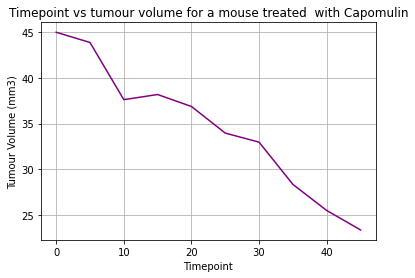

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "s185",:]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], c='purple')
plt.title("Timepoint vs tumour volume for a mouse treated  with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.grid()
plt.show()

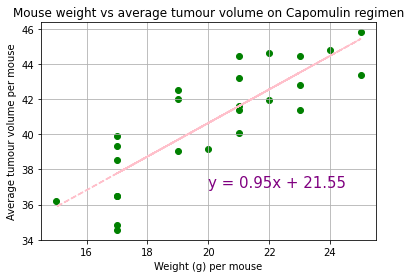

In [65]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin",:]
weight = capomulin.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_vol = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].sum() / capomulin["Mouse ID"].value_counts()

plt.scatter(weight, avg_tumor_vol, c='g')
plt.plot(weight, regress_values,linestyle="dashed", c="pink")
plt.title("Mouse weight vs average tumour volume on Capomulin regimen")
plt.xlabel("Weight (g) per mouse")
plt.ylabel("Average tumour volume per mouse")
plt.annotate(line_eq,(20,37),fontsize=15,color="purple")
plt.grid()
plt.show()

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, avg_tumor_vol)
round(correlation[0],2)

0.84

In [37]:
# Calculating linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))